In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("../")
DATA_PATH = '../data/'

## Data

In [2]:
k = 1
sampled_data = pd.read_pickle(DATA_PATH + 'train_data.pkl').sample(frac=k, random_state=137)
# sample size

In [3]:
# scaling data
%load_ext autoreload
%autoreload 2
from data_pipeline import data_pipeline

# split on train and test
from sklearn.model_selection import train_test_split

pipeline = data_pipeline()
data = pipeline.fit_transform(sampled_data)
unused_features = ['index']
data = data.drop(unused_features, axis=1)
data = data.astype(np.float32)

data.info()

train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)
label_names = [
    'is_downstream_reconstructible',
#     'has_MCParticle_not_electron',
#     'is_downstream_reconstructible_not_electron',
#     'is_true_seed'
]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754766 entries, 1042314 to 3481
Data columns (total 16 columns):
is_downstream_reconstructible    float32
seed_chi2PerDoF                  float32
seed_p                           float32
seed_pt                          float32
seed_nLHCbIDs                    float32
seed_nbIT                        float32
seed_nLayers                     float32
seed_x                           float32
seed_y                           float32
seed_tx                          float32
seed_ty                          float32
seed_mva_value                   float32
seed_angle                       float32
seed_pr                          float32
seed_z_magnet                    float32
seed_r                           float32
dtypes: float32(16)
memory usage: 120.5 MB


### full model

In [4]:
x_train = train_set.drop(label_names, axis=1)
y_train = train_set[label_names].copy().astype(np.int32)

x_test = test_set.drop(label_names, axis=1)
y_test = test_set[label_names].copy().astype(np.int32)

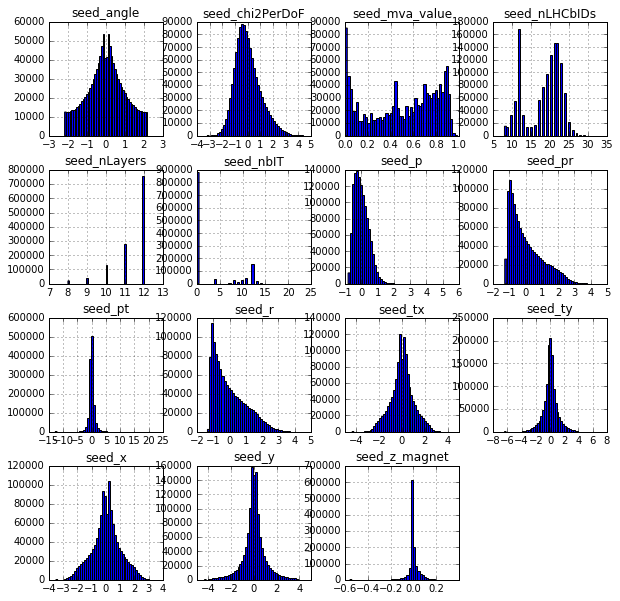

In [5]:
_ = x_train.hist(bins=50, figsize=(10,10))

In [6]:
from models import KerasDNN

Using TensorFlow backend.


In [7]:
from keras.callbacks import TensorBoard
DNNclf = KerasDNN(
    (x_train.shape[1],),
    (2,),
    neurons=100,
    layers=3,
#     dropout=0.05,
    loss_metric='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    last_layer_act='softmax'
)
DNNclf.fit(
    x_train.values, y_train.values,
    epochs=10,
    validation_data=(x_test.values, y_test.values),
#     callbacks=[Tensorboard()]
)

Train on 1228336 samples, validate on 526430 samples
Epoch 1/10
1228336/1228336 [==============================] - 139s - loss: 0.3955 - acc: 0.8277 - val_loss: 0.3623 - val_acc: 0.8459
Epoch 2/10
1228336/1228336 [==============================] - 128s - loss: 0.3642 - acc: 0.8470 - val_loss: 0.3419 - val_acc: 0.8581
Epoch 3/10
1228336/1228336 [==============================] - 130s - loss: 0.3551 - acc: 0.8524 - val_loss: 0.3503 - val_acc: 0.8539
Epoch 4/10
1228336/1228336 [==============================] - 126s - loss: 0.3487 - acc: 0.8561 - val_loss: 0.3347 - val_acc: 0.8653
Epoch 5/10
1228336/1228336 [==============================] - 123s - loss: 0.3444 - acc: 0.8588 - val_loss: 0.3566 - val_acc: 0.8505
Epoch 6/10
1228336/1228336 [==============================] - 124s - loss: 0.3414 - acc: 0.8601 - val_loss: 0.3246 - val_acc: 0.8681
Epoch 7/10
1228336/1228336 [==============================] - 2317s - loss: 0.3396 - acc: 0.8614 - val_loss: 0.3271 - val_acc: 0.8695
Epoch 8/10
1228

In [8]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test.values, DNNclf.predict_proba(x_test.values)[:,1] )

0.9302209000652566

### limited features

In [9]:
unused_features = ['seed_z_magnet', 'seed_mva_value', 'seed_nbIT', 'seed_nLayers', 'seed_angle']
x_train_2 = train_set.drop(label_names + unused_features, axis=1)
x_test_2 = test_set.drop(label_names + unused_features, axis=1)

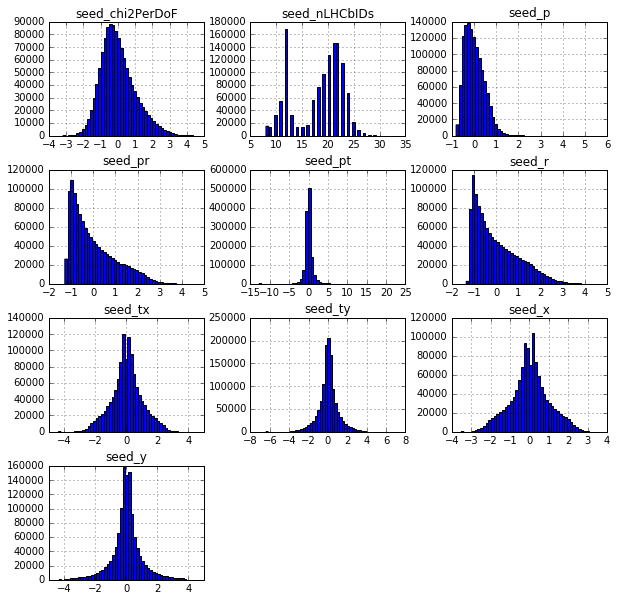

In [10]:
_ = x_train_2.hist(bins=50, figsize=(10,10))

In [11]:
from keras.callbacks import TensorBoard
DNNclf_2 = KerasDNN(
    (x_train_2.shape[1],),
    (2,),
    neurons=100,
    layers=3,
#     dropout=0.05,
    loss_metric='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    last_layer_act='softmax'
)
DNNclf_2.fit(
    x_train_2.values, y_train.values,
    epochs=10,
    validation_data=(x_test_2.values, y_test.values),
#     callbacks=[Tensorboard()]
)

Train on 1228336 samples, validate on 526430 samples
Epoch 1/10
1228336/1228336 [==============================] - 122s - loss: 0.3895 - acc: 0.8339 - val_loss: 0.3698 - val_acc: 0.8471
Epoch 2/10
1228336/1228336 [==============================] - 122s - loss: 0.3538 - acc: 0.8547 - val_loss: 0.3428 - val_acc: 0.8627
Epoch 3/10
1228336/1228336 [==============================] - 123s - loss: 0.3448 - acc: 0.8597 - val_loss: 0.3663 - val_acc: 0.8522
Epoch 4/10
1228336/1228336 [==============================] - 122s - loss: 0.3398 - acc: 0.8623 - val_loss: 0.3411 - val_acc: 0.8624
Epoch 5/10
1228336/1228336 [==============================] - 128s - loss: 0.3362 - acc: 0.8641 - val_loss: 0.3269 - val_acc: 0.8697
Epoch 6/10
1228336/1228336 [==============================] - 130s - loss: 0.3332 - acc: 0.8657 - val_loss: 0.3524 - val_acc: 0.8575
Epoch 7/10
1228336/1228336 [==============================] - 132s - loss: 0.3318 - acc: 0.8663 - val_loss: 0.3236 - val_acc: 0.8729
Epoch 8/10
12283

In [12]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test.values, DNNclf_2.predict_proba(x_test_2.values)[:,1] )

0.92615320269638279

### abs transorm

In [13]:
x_train_3 = train_set.drop(label_names + unused_features, axis=1)
x_train_3.loc[:,['seed_x', 'seed_y', 'seed_tx', 'seed_ty']] = np.abs(x_train_3[['seed_x', 'seed_y', 'seed_tx', 'seed_ty']])
x_test_3 = test_set.drop(label_names + unused_features, axis=1)
x_test_3.loc[:,['seed_x', 'seed_y', 'seed_tx', 'seed_ty']] = np.abs(x_test_3[['seed_x', 'seed_y', 'seed_tx', 'seed_ty']])

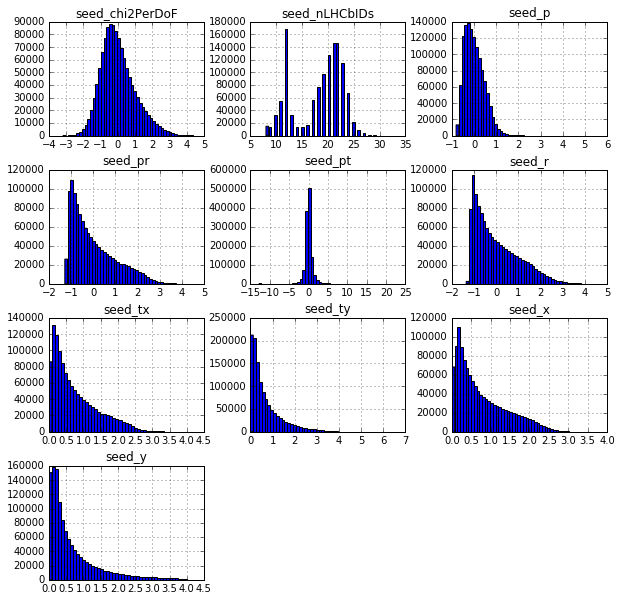

In [14]:
_ = x_train_3.hist(bins=50, figsize=(10,10))

In [15]:
DNNclf_3 = KerasDNN(
    (x_train_3.shape[1],),
    (2,),
    neurons=100,
    layers=3,
#     dropout=0.05,
    loss_metric='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    last_layer_act='softmax'
)
DNNclf_3.fit(
    x_train_3.values, y_train.values,
    epochs=10,
    validation_data=(x_test_3.values, y_test.values),
#     callbacks=[Tensorboard()]
)

Train on 1228336 samples, validate on 526430 samples
Epoch 1/10
1228336/1228336 [==============================] - 127s - loss: 0.3709 - acc: 0.8446 - val_loss: 0.3246 - val_acc: 0.8705
Epoch 2/10
1228336/1228336 [==============================] - 122s - loss: 0.3407 - acc: 0.8614 - val_loss: 0.3246 - val_acc: 0.8673
Epoch 3/10
1228336/1228336 [==============================] - 123s - loss: 0.3339 - acc: 0.8648 - val_loss: 0.3205 - val_acc: 0.8707
Epoch 4/10
1228336/1228336 [==============================] - 124s - loss: 0.3290 - acc: 0.8674 - val_loss: 0.3431 - val_acc: 0.8609
Epoch 5/10
1228336/1228336 [==============================] - 124s - loss: 0.3263 - acc: 0.8688 - val_loss: 0.3169 - val_acc: 0.8761
Epoch 6/10
1228336/1228336 [==============================] - 125s - loss: 0.3232 - acc: 0.8705 - val_loss: 0.3194 - val_acc: 0.8738
Epoch 7/10
1228336/1228336 [==============================] - 126s - loss: 0.3220 - acc: 0.8712 - val_loss: 0.3101 - val_acc: 0.8794
Epoch 8/10
12283

In [16]:

roc_auc_score(y_test.values, DNNclf_3.predict_proba(x_test_3.values)[:,1] )

0.93413970729374884